In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.86M/1.86M [00:00<00:00, 55.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1


In [ ]:
import os
print(os.listdir(path))

['spam_ham_dataset.csv']


In [ ]:
import pandas as pd

# Read CSV file
file_path = os.path.join(path, "spam_ham_dataset.csv")
df = pd.read_csv(file_path)

print("Data preview:")
print(df.head())

Data preview:
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [ ]:
#df.shape
print("Successfully loaded {} rows and {} columns!".format(df.shape[0], df.shape[1]))

Successfully loaded 5171 rows and 4 columns!


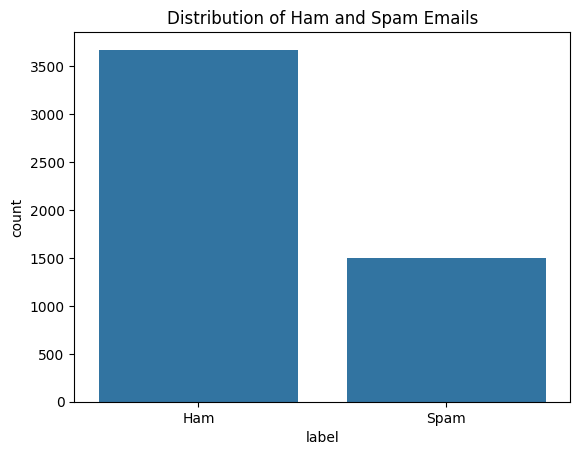

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Distribution of Ham and Spam Emails")
plt.show()

In [ ]:
label_frequency = df['label'].value_counts().reset_index()

# Rename columns for clarity
label_frequency.columns = ['label', 'frequency']

print(label_frequency)

  label  frequency
0   ham       3672
1  spam       1499


In [ ]:
# Calculate percentage of each unique value in 'label' column
label_percentage = df['label'].value_counts(normalize=True).reset_index()

# Rename columns for clarity
label_percentage.columns = ['label', 'percentage']

# Format percentage with percent sign
label_percentage['percentage'] = (label_percentage['percentage'] * 100).round(2).astype(str) + '%'

print(label_percentage)

  label percentage
0   ham     71.01%
1  spam     28.99%


In [ ]:
label_percentage = df['label'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
label_percentage = label_percentage.reset_index().rename(columns={'index': 'label', 'label': 'percentage'})

print(label_percentage)


  percentage proportion
0        ham     71.01%
1       spam     28.99%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = df['text']
y = df['label']

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

In [ ]:
# Convert y_resampled to a DataFrame for easier manipulation
y_resampled_df = pd.DataFrame(y_resampled, columns=['label'])

# Calculate frequency and percentage for each label
frequency = y_resampled_df['label'].value_counts()
percentage = y_resampled_df['label'].value_counts(normalize=True) * 100

# Display frequency and percentage
print("Frequency of each label after resampling:")
print(frequency)
print("\nPercentage of each label after resampling:")
print(percentage)

Frequency of each label after resampling:
label
ham     3672
spam    3672
Name: count, dtype: int64

Percentage of each label after resampling:
label
ham     50.0
spam    50.0
Name: proportion, dtype: float64


In [ ]:
len(X_resampled)

7344

In [ ]:
# Split the data into features and target variable
X = df['text']
y = df['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Initialize and fit the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))


Logistic Regression:
Accuracy: 0.9835748792270531
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       742
        spam       0.97      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [ ]:
# Initialize and fit the SVC model
svc_model = SVC()
svc_model.fit(X_train_tfidf, y_train)

# Make predictions
svc_predictions = svc_model.predict(X_test_tfidf)

# Evaluate the model
print("Support Vector Classifier (SVC):")
print("Accuracy:", accuracy_score(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))


Support Vector Classifier (SVC):
Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       742
        spam       0.96      0.99      0.97       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



In [ ]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest Classifier:
Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       742
        spam       0.98      0.94      0.96       293

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wcukierski/enron-email-dataset")

print("Path to dataset files:", path)

100%|██████████| 358M/358M [00:03<00:00, 102MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/wcukierski/enron-email-dataset/versions/2


In [ ]:
import os
print(os.listdir(path))

['emails.csv']


In [ ]:
# Read CSV file
file_path = os.path.join(path, "emails.csv")
unlabeled_data = pd.read_csv(file_path)

print("Data preview:")
print(unlabeled_data.head())

Data preview:
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
# Extract the text column from the unlabeled dataset
X_unlabeled = unlabeled_data['message']

# Transform the unlabeled data using the same vectorizer
X_unlabeled_tfidf = vectorizer.transform(X_unlabeled)

# Make predictions on the unlabeled dataset
unlabeled_predictions = logistic_model.predict(X_unlabeled_tfidf)

# Add predictions to the unlabeled DataFrame
unlabeled_data['predicted_label'] = unlabeled_predictions

# Preview the results
print("Unlabeled Dataset Predictions:")
print(unlabeled_data[['message', 'predicted_label']].head())


Unlabeled Dataset Predictions:
                                             message predicted_label
0  Message-ID: <18782981.1075855378110.JavaMail.e...             ham
1  Message-ID: <15464986.1075855378456.JavaMail.e...             ham
2  Message-ID: <24216240.1075855687451.JavaMail.e...             ham
3  Message-ID: <13505866.1075863688222.JavaMail.e...             ham
4  Message-ID: <30922949.1075863688243.JavaMail.e...             ham


Unlabeled Dataset Predictions:
                                             message predicted_label
0  Message-ID: <18782981.1075855378110.JavaMail.e...             ham
1  Message-ID: <15464986.1075855378456.JavaMail.e...             ham
2  Message-ID: <24216240.1075855687451.JavaMail.e...             ham
3  Message-ID: <13505866.1075863688222.JavaMail.e...             ham
4  Message-ID: <30922949.1075863688243.JavaMail.e...             ham


<ipython-input-30-87c40808b61d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=unlabeled_data, x='predicted_label', palette='viridis')


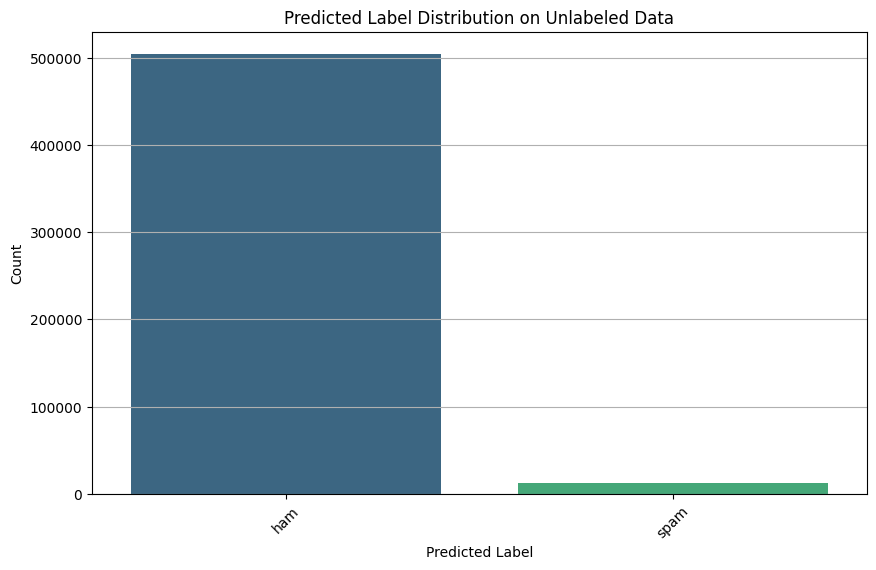

In [ ]:
# Preview the results
print("Unlabeled Dataset Predictions:")
print(unlabeled_data[['message', 'predicted_label']].head())

# Plot the distribution of predicted labels
plt.figure(figsize=(10, 6))
sns.countplot(data=unlabeled_data, x='predicted_label', palette='viridis')
plt.title('Predicted Label Distribution on Unlabeled Data')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Unlabeled Dataset Predictions:
                                             message predicted_label
0  Message-ID: <18782981.1075855378110.JavaMail.e...             ham
1  Message-ID: <15464986.1075855378456.JavaMail.e...             ham
2  Message-ID: <24216240.1075855687451.JavaMail.e...             ham
3  Message-ID: <13505866.1075863688222.JavaMail.e...             ham
4  Message-ID: <30922949.1075863688243.JavaMail.e...             ham
Predictions saved to /content/unlabeled_predictions.csv


<ipython-input-31-e2fa99b9726d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=unlabeled_data, x='predicted_label', palette='viridis')


Plot saved to predicted_label_distribution.png


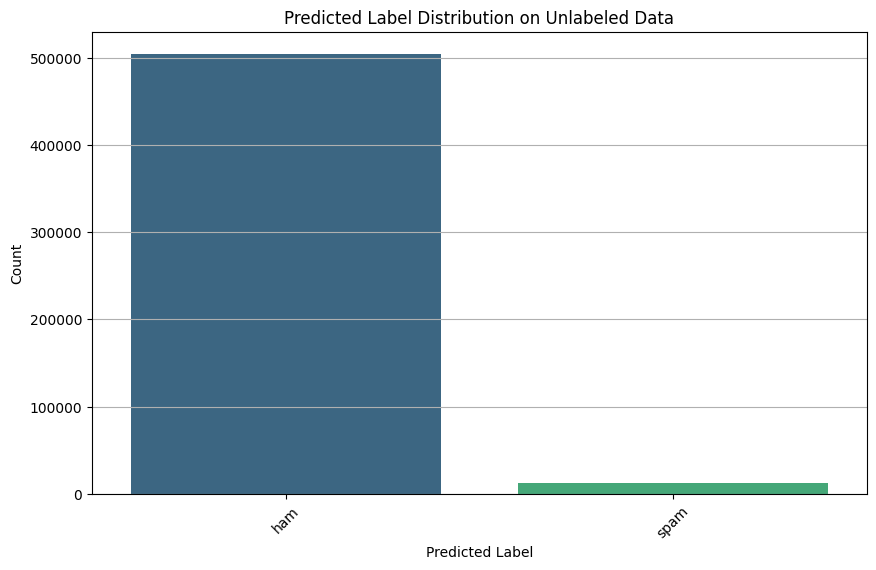

In [ ]:
# Assuming unlabeled_data contains the predictions
print("Unlabeled Dataset Predictions:")
print(unlabeled_data[['message', 'predicted_label']].head())

# Save the predictions to a CSV file
output_file_path = '/content/unlabeled_predictions.csv'
#unlabeled_data.to_csv(output_file_path, index=False)
print(f"Predictions saved to {output_file_path}")

# Plot the distribution of predicted labels
plt.figure(figsize=(10, 6))
sns.countplot(data=unlabeled_data, x='predicted_label', palette='viridis')
plt.title('Predicted Label Distribution on Unlabeled Data')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the plot as an image
plot_file_path = 'predicted_label_distribution.png'  # Specify your desired image file path
plt.savefig(plot_file_path)
print(f"Plot saved to {plot_file_path}")

# Show the plot
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving unlabeled_predictions.csv to unlabeled_predictions.csv


In [ ]:
import os

curr_dir = os.getcwd()
print(curr_dir)

/content


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample code to load labeled_data
labeled_data = pd.read_csv('unlabeled_predictions.csv')  # Replace with your file path

# Initialize and fit the vectorizer on some training data
vectorizer = TfidfVectorizer()
vectorizer.fit(labeled_data['message'])  # Fit on your data if not already done

# Transform the labeled data
X_labeled_tfidf = vectorizer.transform(labeled_data['message'])

# Get true labels
y_true = labeled_data['predicted_label']

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_labeled_tfidf, y_true)  # Fit the model on your TF-IDF data and true labels

# Generate predictions
y_pred = model.predict(X_labeled_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_pred contains the model's predictions
# Example: y_pred = model.predict(X_labeled_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print accuracy
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9929184520323695


In [ ]:
#X_labeled_tfidf = vectorizer.transform(labeled_data['message'])

# Get true labels
#y_true = labeled_data['predicted_label']

# Calculate frequency and percentage of each unique label in y_true
label_counts = y_true.value_counts()
label_percentages = (y_true.value_counts(normalize=True) * 100).round(2)
# Display the results
print("Frequency of each label:")
print(label_counts)

print("\nPercentage of each label:")
print(label_percentages.round(2).astype(str) + '%')

Frequency of each label:
predicted_label
ham     504582
spam     12819
Name: count, dtype: int64

Percentage of each label:
predicted_label
ham     97.52%
spam     2.48%
Name: proportion, dtype: object
